In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import cv2
import imutils
import numpy as np
from imutils import paths
import os
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import backend
from keras.models import Sequential
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD


def read_image(image_file_path):
    """Reads in the image using openCV"""
    return cv2.imread(image_file_path)

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [3]:
def grayscale(image):
    """Grayscales image using openCV."""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>

In [4]:
def normalize_dimensions(image, desired_width=20, desired_height=20):
    """Resizes image to desired dimensions using white padding and rescaling."""
    (h, w) = image.shape[:2]
    if w > h:
        image = imutils.resize(image, width=desired_width)
    else:
        image = imutils.resize(image, height=desired_height)
    width_padding = int((desired_width - image.shape[1]) / 2)
    height_padding = int((desired_height - image.shape[0]) / 2)
    WHITE = [255, 255, 255]
    image_with_border = cv2.copyMakeBorder(
        image,
        height_padding,
        height_padding,
        width_padding,
        width_padding,
        cv2.BORDER_CONSTANT,
        value=WHITE,
    )
    image_with_border_resized = cv2.resize(
        image_with_border, (desired_width, desired_height), interpolation=cv2.INTER_AREA
    )
    return image_with_border_resized

<IPython.core.display.Javascript object>

In [5]:
def reshape_for_keras(image):
    """Adds a dummy dimension to fit keras's input requirements."""
    return np.expand_dims(image, axis=2)

<IPython.core.display.Javascript object>

In [6]:
images = []
labels = []
captcha_processing_output_folder = "extracted_character_images"
for image_file_path in paths.list_images(captcha_processing_output_folder):
    image = read_image(image_file_path)
    image_gray = grayscale(image)
    image_normalized = normalize_dimensions(image_gray)
    #     image_reshaped_for_keras = reshape_for_keras(image_normalized)
    image_reshaped_for_keras = np.resize(image_normalized, (400,))
    images.append(image_reshaped_for_keras)
    label = image_file_path.split(os.path.sep)[-2]
    labels.append(label)

<IPython.core.display.Javascript object>

In [7]:
X = np.array(images, dtype="float") / 255.0
labels = np.array(labels)

<IPython.core.display.Javascript object>

In [8]:
label_binarizer = LabelBinarizer().fit(labels)
y = label_binarizer.transform(labels)

<IPython.core.display.Javascript object>

In [9]:
print(X.shape)

(18340, 400)


<IPython.core.display.Javascript object>

In [10]:
print(y[678])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<IPython.core.display.Javascript object>

In [11]:
num_classes = len(set(labels))

<IPython.core.display.Javascript object>

In [12]:
print(num_classes)

32


<IPython.core.display.Javascript object>

In [14]:
print(X[0].shape)

(400,)


<IPython.core.display.Javascript object>

In [15]:
model = Sequential()
model.add(Dense(55, input_shape=(400,), activation="relu"))
model.add(Dense(55, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

<IPython.core.display.Javascript object>

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 55)                22055     
_________________________________________________________________
dense_2 (Dense)              (None, 55)                3080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1792      
Total params: 26,927
Trainable params: 26,927
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

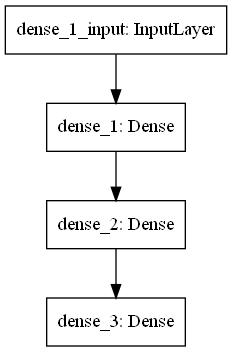

<IPython.core.display.Javascript object>

In [17]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file="model2.png", show_layer_names=True)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

<IPython.core.display.Javascript object>

In [19]:
# print(X_train[0])

<IPython.core.display.Javascript object>

In [21]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20,
    verbose=1,
)

Train on 14672 samples, validate on 3668 samples
Epoch 1/20
14672/14672 [==============================] - 3s 174us/step - loss: 0.0270 - acc: 0.9933 - val_loss: 0.0773 - val_acc: 0.9850
Epoch 2/20
14672/14672 [==============================] - 3s 178us/step - loss: 0.0259 - acc: 0.9921 - val_loss: 0.0617 - val_acc: 0.9880
Epoch 3/20
14672/14672 [==============================] - 2s 169us/step - loss: 0.0239 - acc: 0.9933 - val_loss: 0.0729 - val_acc: 0.9858
Epoch 4/20
14672/14672 [==============================] - 3s 171us/step - loss: 0.0236 - acc: 0.9937 - val_loss: 0.0623 - val_acc: 0.9880
Epoch 5/20
14672/14672 [==============================] - 2s 169us/step - loss: 0.0199 - acc: 0.9949 - val_loss: 0.0989 - val_acc: 0.9787
Epoch 6/20
14672/14672 [==============================] - 3s 175us/step - loss: 0.0221 - acc: 0.9921 - val_loss: 0.0641 - val_acc: 0.9883
Epoch 7/20
14672/14672 [==============================] - 3s 181us/step - loss: 0.0209 - acc: 0.9942 - val_loss: 0.0613 - v

<IPython.core.display.Javascript object>

In [22]:
print("Generating test predictions...")
predictions = model.predict_classes(X_test, verbose=1)
print(predictions)

Generating test predictions...
3668/3668 [==============================] - 0s 91us/step
[25  3  0 ...  0 11 23]


<IPython.core.display.Javascript object>

In [23]:
import pickle

pickle.dump(label_binarizer, open("binarizer.pkl", "wb"))
model.save_weights("weights.h5")

<IPython.core.display.Javascript object>